In [4]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Configuration de l'interface utilisateur
st.set_page_config(page_title="Gestion de Données CSV", layout="wide")
st.title("Application de Gestion de Données CSV")
st.write("Cette application vous permet de télécharger un fichier CSV, de le visualiser, de l'analyser et d'effectuer des modifications simples.")

# 2. Téléchargement du fichier CSV
uploaded_file = st.file_uploader("Téléchargez votre fichier CSV", type=["csv"])

if uploaded_file is not None:
    # 3. Chargement des données
    df = pd.read_csv(uploaded_file)
    
    # Affichage du DataFrame
    st.subheader("Aperçu des Données")
    st.dataframe(df.head())

    # Affichage des informations générales
    st.subheader("Informations sur le Dataset")
    st.write(df.describe())
    
    # Affichage de la structure du DataFrame
    st.subheader("Structure des Données")
    st.write(df.info())

    # 4. Visualisation des Données
    st.subheader("Visualisation des Données")
    # Sélectionner les colonnes pour l'affichage
    columns = df.columns.tolist()
    x_axis = st.selectbox("Sélectionnez la colonne pour l'axe X", columns)
    y_axis = st.selectbox("Sélectionnez la colonne pour l'axe Y", columns)
    chart_type = st.selectbox("Sélectionnez le type de graphique", ["Scatter Plot", "Line Plot", "Bar Plot", "Box Plot"])

    if chart_type == "Scatter Plot":
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=x_axis, y=y_axis, data=df)
        st.pyplot(plt)
    elif chart_type == "Line Plot":
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=x_axis, y=y_axis, data=df)
        st.pyplot(plt)
    elif chart_type == "Bar Plot":
        plt.figure(figsize=(10, 6))
        sns.barplot(x=x_axis, y=y_axis, data=df)
        st.pyplot(plt)
    elif chart_type == "Box Plot":
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=x_axis, y=y_axis, data=df)
        st.pyplot(plt)
    
    # 5. Analyse des Données
    st.subheader("Analyse des Données")
    if st.checkbox("Afficher les valeurs manquantes"):
        st.write(df.isnull().sum())
    
    # Remplissage des valeurs manquantes
    st.subheader("Traitement des Valeurs Manquantes")
    missing_col = st.selectbox("Sélectionnez la colonne pour remplir les valeurs manquantes", columns)
    fill_method = st.selectbox("Méthode de remplissage", ["Moyenne", "Médiane", "Mode", "Valeur fixe"])
    
    if fill_method == "Moyenne":
        df[missing_col].fillna(df[missing_col].mean(), inplace=True)
    elif fill_method == "Médiane":
        df[missing_col].fillna(df[missing_col].median(), inplace=True)
    elif fill_method == "Mode":
        df[missing_col].fillna(df[missing_col].mode()[0], inplace=True)
    elif fill_method == "Valeur fixe":
        fixed_value = st.number_input("Entrez la valeur fixe", value=0)
        df[missing_col].fillna(fixed_value, inplace=True)
    
    st.write(f"Valeurs manquantes après traitement: {df[missing_col].isnull().sum()}")
    
    # 6. Filtrage des Données
    st.subheader("Filtrage des Données")
    filter_column = st.selectbox("Sélectionnez la colonne pour filtrer", columns)
    unique_values = df[filter_column].unique().tolist()
    filter_value = st.selectbox("Sélectionnez la valeur pour filtrer", unique_values)
    
    filtered_df = df[df[filter_column] == filter_value]
    st.write(f"Aperçu des données filtrées pour la colonne `{filter_column}` avec la valeur `{filter_value}`")
    st.dataframe(filtered_df.head())

    # 7. Exporter les Données Modifiées
    st.subheader("Exporter les Données")
    csv = df.to_csv(index=False).encode('utf-8')
    st.download_button(
        label="Télécharger les données en CSV",
        data=csv,
        file_name='modified_data.csv',
        mime='text/csv',
    )
else:
    st.write("Veuillez télécharger un fichier CSV pour commencer.")


2024-08-23 15:15:17.294 
  command:

    streamlit run c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


Données chargées avec succès à partir de Churn_Modelling.csv
Colonnes non numériques encodées avec succès.
Statistiques descriptives :
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288      

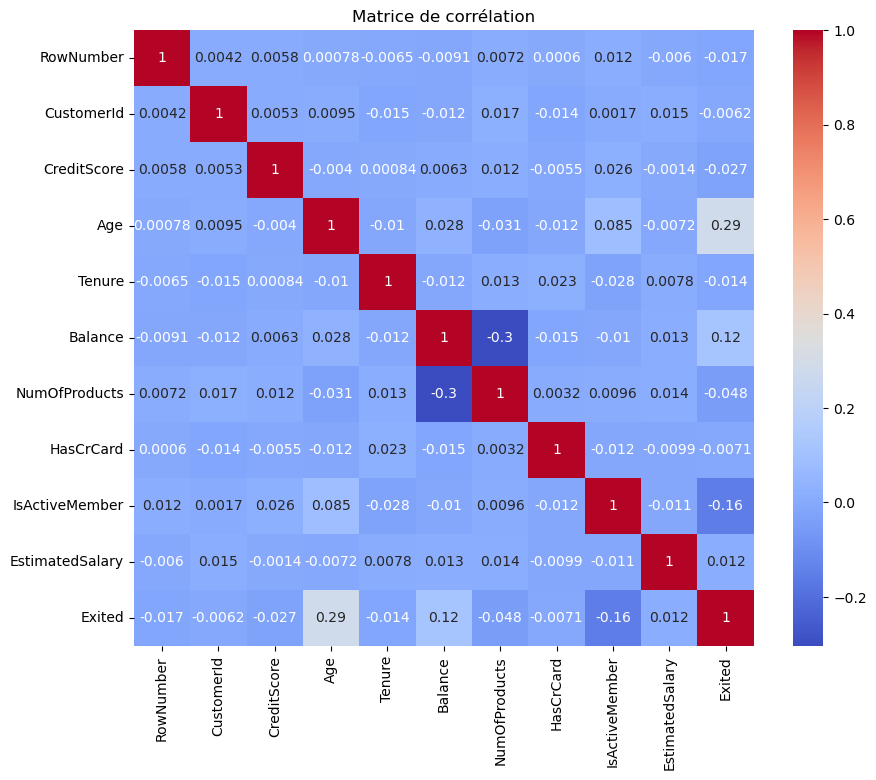


Histogrammes :


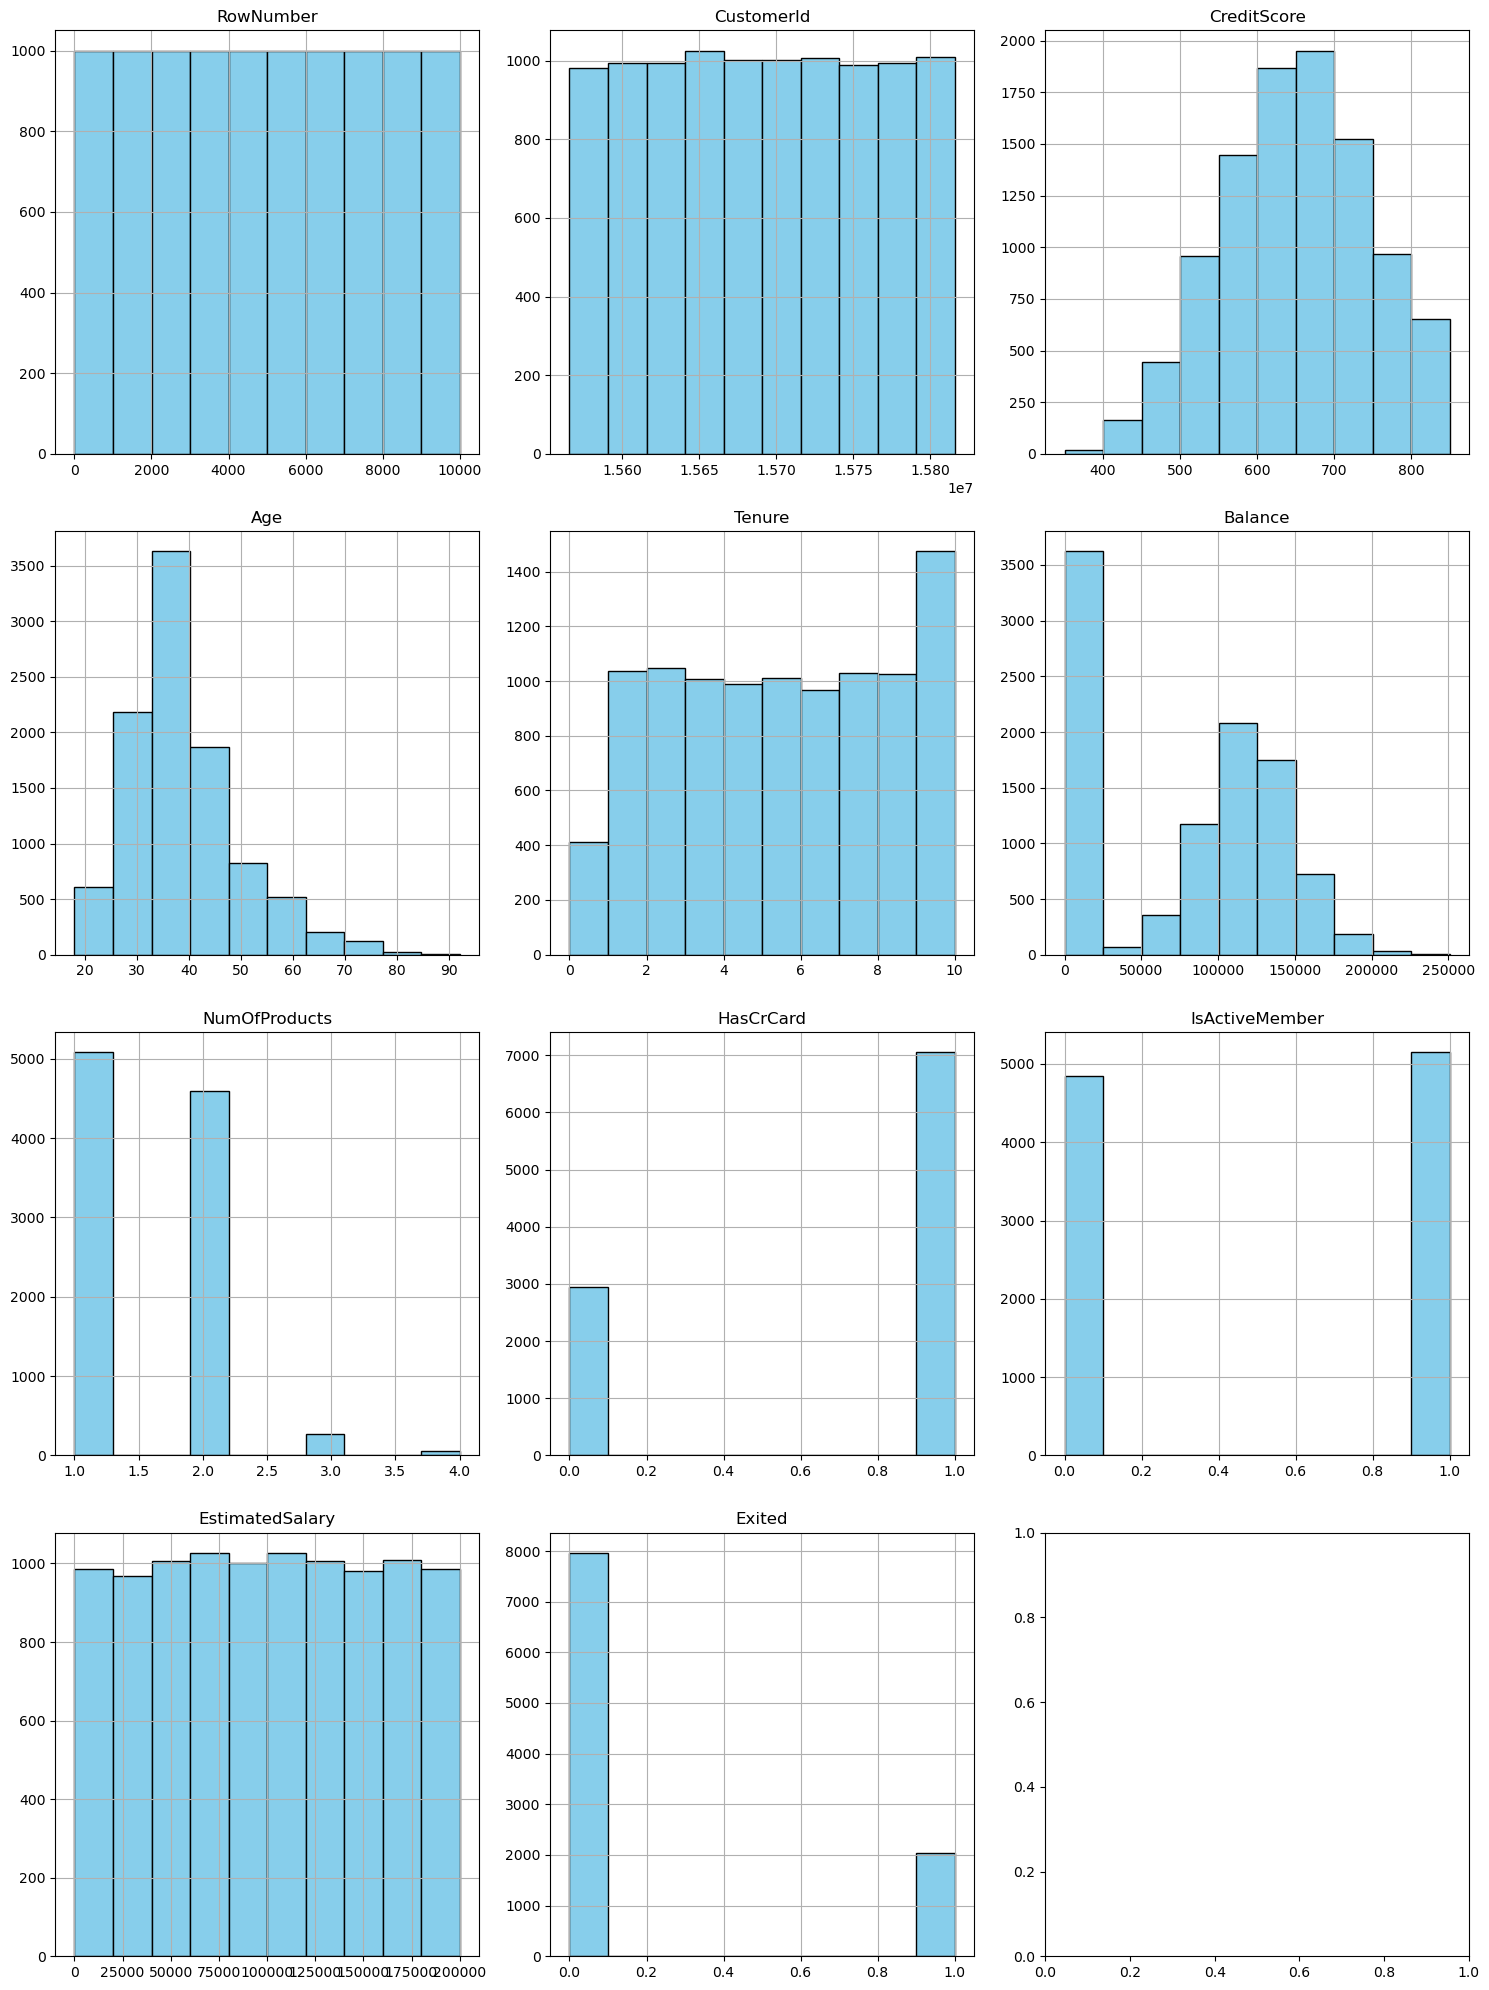


Diagramme de dispersion :


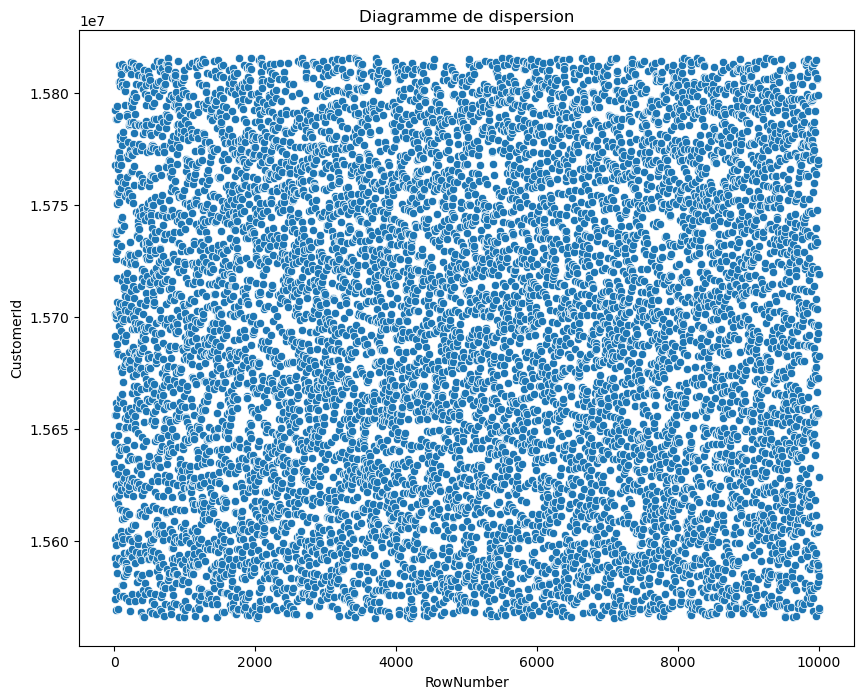

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour charger un fichier CSV
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Données chargées avec succès à partir de {file_path}")
        return df
    except FileNotFoundError:
        print(f"Erreur : le fichier {file_path} n'a pas été trouvé.")
        return None
    except Exception as e:
        print(f"Une erreur s'est produite lors du chargement des données : {str(e)}")
        return None

# Fonction pour encoder les colonnes non numériques
def encode_non_numeric_columns(df):
    try:
        # Encoder les colonnes non numériques en one-hot encoding
        df_encoded = pd.get_dummies(df, drop_first=True)
        print("Colonnes non numériques encodées avec succès.")
        return df_encoded
    except Exception as e:
        print(f"Une erreur s'est produite lors de l'encodage des colonnes : {str(e)}")
        return df

# Fonction pour analyser les données et générer des graphiques
def analyze_data(df):
    try:
        # Sélection des colonnes numériques uniquement
        numeric_df = df.select_dtypes(include=[np.number])
        
        if numeric_df.empty:
            print("Aucune donnée numérique trouvée pour l'analyse.")
            return

        # Statistiques descriptives
        print("Statistiques descriptives :")
        print(numeric_df.describe())
        
        # Matrice de corrélation
        print("\nMatrice de corrélation :")
        corr_matrix = numeric_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title("Matrice de corrélation")
        plt.show()
        
        # Histogrammes
        print("\nHistogrammes :")
        ncols = 3
        nrows = (len(numeric_df.columns) + ncols - 1) // ncols
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
        axes = axes.ravel()
        for i, col in enumerate(numeric_df.columns):
            numeric_df[col].hist(ax=axes[i], color='skyblue', edgecolor='black')
            axes[i].set_title(col)
        plt.tight_layout()
        plt.show()
        
        # Diagramme de dispersion (si au moins deux colonnes numériques sont présentes)
        if len(numeric_df.columns) >= 2:
            print("\nDiagramme de dispersion :")
            plt.figure(figsize=(10, 8))
            sns.scatterplot(data=numeric_df, x=numeric_df.columns[0], y=numeric_df.columns[1])
            plt.title("Diagramme de dispersion")
            plt.xlabel(numeric_df.columns[0])
            plt.ylabel(numeric_df.columns[1])
            plt.show()
        else:
            print("Pas assez de colonnes numériques pour générer un diagramme de dispersion.")
            
    except Exception as e:
        print(f"Une erreur s'est produite lors de l'analyse des données : {str(e)}")

# Exemple d'utilisation
file_path = "Churn_Modelling.csv"
df = load_csv_data(file_path)

if df is not None:
    # Encodage des colonnes non numériques
    df_encoded = encode_non_numeric_columns(df)
    
    # Analyse des données encodées
    analyze_data(df_encoded)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fonction pour charger un fichier CSV
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path)
        st.success(f"Données chargées avec succès à partir de {file_path}")
        return df
    except FileNotFoundError:
        st.error(f"Erreur : le fichier {file_path} n'a pas été trouvé.")
    except Exception as e:
        st.error(f"Une erreur s'est produite lors du chargement des données : {str(e)}")
        return None

# Fonction pour encoder les colonnes non numériques
def encode_non_numeric_columns(df):
    try:
        df_encoded = pd.get_dummies(df, drop_first=True)
        st.success("Colonnes non numériques encodées avec succès.")
        return df_encoded
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'encodage des colonnes : {str(e)}")
        return df

# Fonction pour analyser les données et générer des graphiques
def analyze_data(df, columns):
    try:
        numeric_df = df[columns].select_dtypes(include=[np.number])

        if numeric_df.empty:
            st.warning("Aucune donnée numérique trouvée pour l'analyse.")
            return

        # Statistiques descriptives
        st.subheader("Statistiques descriptives :")
        st.write(numeric_df.describe())

        # Matrice de corrélation
        st.subheader("Matrice de corrélation :")
        corr_matrix = numeric_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        st.pyplot(plt)
        plt.close()

        # Histogrammes
        st.subheader("Histogrammes :")
        ncols = 3
        nrows = (len(numeric_df.columns) + ncols - 1) // ncols
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
        axes = axes.ravel()
        for i, col in enumerate(numeric_df.columns):
            numeric_df[col].hist(ax=axes[i], color='skyblue', edgecolor='black')
            axes[i].set_title(col)
        plt.tight_layout()
        st.pyplot(fig)
        plt.close()

        # Diagramme de dispersion (si au moins deux colonnes numériques sont présentes)
        if len(numeric_df.columns) >= 2:
            st.subheader("Diagramme de dispersion :")
            plt.figure(figsize=(10, 8))
            sns.scatterplot(data=numeric_df, x=numeric_df.columns[0], y=numeric_df.columns[1])
            plt.title("Diagramme de dispersion")
            st.pyplot(plt)
            plt.close()

        # Boxplots
        st.subheader("Boxplots :")
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
        axes = axes.ravel()
        for i, col in enumerate(numeric_df.columns):
            sns.boxplot(y=numeric_df[col], ax=axes[i], color='lightgreen')
            axes[i].set_title(col)
        plt.tight_layout()
        st.pyplot(fig)
        plt.close()

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'analyse des données : {str(e)}")

# Fonction pour prédire les valeurs à partir d'un modèle de régression linéaire
def linear_regression_model(df, target_column):
    try:
        X = df.drop(columns=[target_column]).select_dtypes(include=[np.number])
        y = df[target_column]

        if X.empty or y.empty:
            st.error("Les colonnes numériques nécessaires pour l'entraînement du modèle ne sont pas disponibles.")
            return

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Évaluation du modèle
        st.subheader("Évaluation du modèle de régression linéaire :")
        st.write(f"RMSE : {mean_squared_error(y_test, y_pred, squared=False):.2f}")
        st.write(f"R² : {r2_score(y_test, y_pred):.2f}")

        # Diagramme de dispersion des résultats
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Valeurs Réelles')
        plt.ylabel('Valeurs Prédites')
        plt.title("Prédictions du modèle de régression linéaire")
        st.pyplot(plt)
        plt.close()

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'entraînement du modèle : {str(e)}")

# Fonction pour configurer des alertes basées sur des critères
def set_alerts(df):
    st.subheader("Configurer des alertes personnalisées :")
    selected_column = st.selectbox("Sélectionner une colonne pour configurer une alerte", df.columns)
    threshold = st.number_input(f"Définir un seuil pour {selected_column}", value=0.0)

    # Vérification des alertes
    alerts = df[df[selected_column] > threshold]
    if not alerts.empty:
        st.warning(f"Alerte ! {len(alerts)} lignes dépassent le seuil de {threshold} pour la colonne {selected_column}.")
        st.write(alerts)

# Fonction pour filtrer les données
def filter_data(df):
    columns = st.multiselect("Sélectionnez les colonnes à analyser", df.columns)
    return columns

# Fonction pour exporter les résultats
def export_data(df):
    export_format = st.selectbox("Choisir le format d'export", ['CSV', 'Excel', 'PDF'])

    if st.button("Exporter"):
        if export_format == 'CSV':
            csv = df.to_csv(index=False).encode('utf-8')
            st.download_button(label="Télécharger CSV", data=csv, file_name='export_data.csv', mime='text/csv')
        elif export_format == 'Excel':
            excel_data = df.to_excel(index=False)
            st.download_button(label="Télécharger Excel", data=excel_data, file_name='export_data.xlsx', mime='application/vnd.ms-excel')

# Fonction principale
def main():
    st.title("Application d'Analyse de Données avec Modélisation et Alertes")

    file_path = st.text_input("Entrez le chemin du fichier CSV :")
    df = load_csv_data(file_path)

    if df is not None:
        # Encodage des colonnes non numériques
        df_encoded = encode_non_numeric_columns(df)

        # Filtrage des données
        columns = filter_data(df_encoded)

        # Analyse des données
        if columns:
            analyze_data(df_encoded, columns)

        # Prédiction avec Régression Linéaire
        if st.checkbox("Activer la prédiction avec Régression Linéaire"):
            target_column = st.selectbox("Sélectionnez la colonne cible", columns)
            linear_regression_model(df_encoded, target_column)

        # Configuration d'alertes
        if st.checkbox("Configurer des alertes basées sur des seuils"):
            set_alerts(df_encoded)

        # Exporter les résultats
        export_data(df_encoded)

if __name__ == "__main__":
    main()


In [7]:
#!pip install streamlit pandas matplotlib seaborn scikit-learn


In [8]:
with open(f'app_csv.py', 'w')as f:
    f.write("""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Fonction pour charger un fichier CSV
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path)
        st.success(f"Données chargées avec succès à partir de {file_path}")
        return df
    except FileNotFoundError:
        st.error(f"Erreur : le fichier {file_path} n'a pas été trouvé.")
    except Exception as e:
        st.error(f"Une erreur s'est produite lors du chargement des données : {str(e)}")
        return None

# Fonction pour encoder les colonnes non numériques
def encode_non_numeric_columns(df):
    try:
        df_encoded = pd.get_dummies(df, drop_first=True)
        st.success("Colonnes non numériques encodées avec succès.")
        return df_encoded
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'encodage des colonnes : {str(e)}")
        return df

# Fonction pour analyser les données et générer des graphiques
def analyze_data(df, columns):
    try:
        numeric_df = df[columns].select_dtypes(include=[np.number])

        if numeric_df.empty:
            st.warning("Aucune donnée numérique trouvée pour l'analyse.")
            return

        # Statistiques descriptives
        st.subheader("Statistiques descriptives :")
        st.write(numeric_df.describe())

        # Matrice de corrélation
        st.subheader("Matrice de corrélation :")
        corr_matrix = numeric_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        st.pyplot(plt)
        plt.close()

        # Histogrammes
        st.subheader("Histogrammes :")
        ncols = 3
        nrows = (len(numeric_df.columns) + ncols - 1) // ncols
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
        axes = axes.ravel()
        for i, col in enumerate(numeric_df.columns):
            numeric_df[col].hist(ax=axes[i], color='skyblue', edgecolor='black')
            axes[i].set_title(col)
        plt.tight_layout()
        st.pyplot(fig)
        plt.close()

        # Diagramme de dispersion (si au moins deux colonnes numériques sont présentes)
        if len(numeric_df.columns) >= 2:
            st.subheader("Diagramme de dispersion :")
            plt.figure(figsize=(10, 8))
            sns.scatterplot(data=numeric_df, x=numeric_df.columns[0], y=numeric_df.columns[1])
            plt.title("Diagramme de dispersion")
            st.pyplot(plt)
            plt.close()

        # Boxplots
        st.subheader("Boxplots :")
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
        axes = axes.ravel()
        for i, col in enumerate(numeric_df.columns):
            sns.boxplot(y=numeric_df[col], ax=axes[i], color='lightgreen')
            axes[i].set_title(col)
        plt.tight_layout()
        st.pyplot(fig)
        plt.close()

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'analyse des données : {str(e)}")

# Fonction pour prédire les valeurs à partir d'un modèle de régression linéaire ou classification
def machine_learning_model(df, target_column, model_type='regression'):
    try:
        X = df.drop(columns=[target_column]).select_dtypes(include=[np.number])
        y = df[target_column]

        if X.empty or y.empty:
            st.error("Les colonnes numériques nécessaires pour l'entraînement du modèle ne sont pas disponibles.")
            return

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        if model_type == 'regression':
            model = LinearRegression()
        elif model_type == 'classification':
            model = LogisticRegression(max_iter=1000)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Évaluation du modèle
        if model_type == 'regression':
            st.subheader("Évaluation du modèle de régression linéaire :")
            st.write(f"RMSE : {mean_squared_error(y_test, y_pred, squared=False):.2f}")
            st.write(f"R² : {r2_score(y_test, y_pred):.2f}")

            # Diagramme de dispersion des résultats
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=y_test, y=y_pred)
            plt.xlabel('Valeurs Réelles')
            plt.ylabel('Valeurs Prédites')
            plt.title("Prédictions du modèle de régression linéaire")
            st.pyplot(plt)
            plt.close()

        elif model_type == 'classification':
            st.subheader("Évaluation du modèle de classification :")
            st.write(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'entraînement du modèle : {str(e)}")

# Fonction pour configurer des alertes basées sur des critères financiers
def set_alerts(df):
    st.subheader("Configurer des alertes basées sur des critères financiers :")
    selected_column = st.selectbox("Sélectionner une colonne pour configurer une alerte", df.columns)
    threshold = st.number_input(f"Définir un seuil pour {selected_column}", value=0.0)

    # Vérification des alertes
    alerts = df[df[selected_column] > threshold]
    if not alerts.empty:
        st.warning(f"Alerte ! {len(alerts)} lignes dépassent le seuil de {threshold} pour la colonne {selected_column}.")
        st.write(alerts)

# Fonction pour filtrer les données
def filter_data(df):
    columns = st.multiselect("Sélectionnez les colonnes à analyser", df.columns)
    return columns

# Fonction pour exporter les résultats
def export_data(df):
    export_format = st.selectbox("Choisir le format d'export", ['CSV', 'Excel', 'PDF'])

    if st.button("Exporter"):
        if export_format == 'CSV':
            csv = df.to_csv(index=False).encode('utf-8')
            st.download_button(label="Télécharger CSV", data=csv, file_name='export_data.csv', mime='text/csv')
        elif export_format == 'Excel':
            excel_data = df.to_excel(index=False)
            st.download_button(label="Télécharger Excel", data=excel_data, file_name='export_data.xlsx', mime='application/vnd.ms-excel')

# Fonction principale
def main():
    st.title("Application d'Analyse de Données avec Modélisation, Prédiction et Alertes")

    file_path = st.text_input("Entrez le chemin du fichier CSV :")
    df = load_csv_data(file_path)

    if df is not None:
        # Encodage des colonnes non numériques
        df_encoded = encode_non_numeric_columns(df)

        # Filtrage des données
        columns = filter_data(df_encoded)

        # Analyse des données
        if columns:
            analyze_data(df_encoded, columns)

        # Prédiction avec Modèles de Machine Learning
        if st.checkbox("Activer la prédiction avec Machine Learning"):
            target_column = st.selectbox("Sélectionnez la colonne cible", columns)
            model_type = st.radio("Sélectionnez le type de modèle", ('regression', 'classification'))
            machine_learning_model(df_encoded, target_column, model_type)

        # Configuration d'alertes
        if st.checkbox("Configurer des alertes basées sur des seuils financiers"):
            set_alerts(df_encoded)

        # Exporter les résultats
        export_data(df_encoded)

if __name__ == "__main__":
    main()

            """)
    
!streamlit run app_csv.py

^C


In [10]:
with open(f'app_csv.py', 'w')as f:
    f.write("""
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Fonction pour charger un fichier CSV
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        st.error(f"Erreur : le fichier {file_path} n'a pas été trouvé.")
        return None
    except Exception as e:
        st.error(f"Une erreur s'est produite lors du chargement des données : {str(e)}")
        return None

# Fonction pour transformer les données
def transform_data(df, transformations):
    try:
        for transformation in transformations:
            df = transformation(df)
        return df
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la transformation des données : {str(e)}")
        return df

# Fonction pour modifier les données
def modify_data(df, modifications):
    try:
        for modification in modifications:
            df = modification(df)
        return df
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la modification des données : {str(e)}")
        return df

# Fonction pour analyser les données et générer des graphiques interactifs
def analyze_data(df):
    try:
        st.subheader("Statistiques Descriptives")
        st.write(df.describe(include='all'))

        # Matrice de corrélation avec Plotly (pour les colonnes numériques uniquement)
        st.subheader("Matrice de Corrélation")
        num_cols = df.select_dtypes(include='number').columns
        corr_matrix = df[num_cols].corr()
        fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale='Viridis')
        st.plotly_chart(fig)

        # Histogrammes
        st.subheader("Histogrammes")
        for col in num_cols:
            fig = px.histogram(df, x=col, title=f'Histogramme de {col}')
            st.plotly_chart(fig)

        # Diagramme de dispersion (si au moins deux colonnes numériques)
        st.subheader("Diagramme de Dispersion")
        if len(num_cols) >= 2:
            fig = px.scatter(df, x=num_cols[0], y=num_cols[1], title="Diagramme de Dispersion")
            st.plotly_chart(fig)
        else:
            st.warning("Pas assez de colonnes numériques pour créer un diagramme de dispersion.")
    
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'analyse des données : {str(e)}")

# Fonction pour les modèles de Machine Learning
def train_ml_models(df):
    try:
        st.subheader("Machine Learning")

        # Encoder les colonnes catégorielles
        categorical_cols = df.select_dtypes(include='object').columns
        le = LabelEncoder()
        for col in categorical_cols:
            df[col] = le.fit_transform(df[col].astype(str))

        # Choisir une colonne cible
        target_column = st.selectbox("Choisissez la colonne cible", df.columns)
        if target_column not in df.columns:
            st.error("Colonne cible non valide.")
            return

        # Diviser les données
        X = df.drop(columns=[target_column])
        y = df[target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Sélectionner un modèle
        model_type = st.selectbox("Choisissez un modèle", ["Régression Linéaire", "Régression Logistique", "Random Forest"])
        if model_type == "Régression Linéaire":
            model = LinearRegression()
        elif model_type == "Régression Logistique":
            model = LogisticRegression(max_iter=1000)
        elif model_type == "Random Forest":
            model = RandomForestRegressor()

        # Entraîner le modèle
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Évaluer le modèle
        if model_type in ["Régression Linéaire", "Random Forest"]:
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            st.write(f"Erreur Quadratique Moyenne : {mse}")
            st.write(f"Score R² : {r2}")
        else:
            accuracy = accuracy_score(y_test, predictions)
            st.write(f"Précision : {accuracy}")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'entraînement du modèle : {str(e)}")

# Fonction pour générer des alertes
def generate_alerts(df, threshold):
    try:
        st.subheader("Alertes Basées sur des Critères")

        # Exemple d'alerte basée sur une colonne
        column = st.selectbox("Choisissez une colonne pour les alertes", df.columns)
        df_alerts = df[df[column] > threshold]

        if not df_alerts.empty:
            st.write(f"Alerte : {len(df_alerts)} lignes dépassent le seuil de {threshold}.")
            st.dataframe(df_alerts)
        else:
            st.write("Aucune alerte générée.")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la génération des alertes : {str(e)}")

# Fonction principale de l'application
def main():
    st.title("Analyse et Machine Learning des Données")

    # Téléchargement des données
    uploaded_file = st.file_uploader("Téléchargez un fichier CSV", type=["csv"])
    if uploaded_file:
        df = load_csv_data(uploaded_file)
        if df is not None:
            # Transformation des données
            st.sidebar.header("Transformation des Données")
            transformations = [
                lambda x: x.dropna() if st.sidebar.checkbox('Supprimer les valeurs manquantes') else x,
                lambda x: x.rename(columns={'colonne1': 'nouvelle_colonne1', 'colonne2': 'nouvelle_colonne2'}) if st.sidebar.checkbox('Renommer les colonnes') else x,
                lambda x: x.drop_duplicates() if st.sidebar.checkbox('Supprimer les doublons') else x
            ]
            df = transform_data(df, transformations)

            # Modification des données
            st.sidebar.header("Modification des Données")
            modifications = [
                lambda x: x.assign(nouvelle_colonne=x['colonne1'] * x['colonne2']) if st.sidebar.checkbox('Ajouter une colonne calculée') else x,
                lambda x: x.loc[x['colonne3'] > 0] if st.sidebar.checkbox('Filtrer les lignes') else x
            ]
            df = modify_data(df, modifications)

            # Analyse des données
            analyze_data(df)

            # Entraînement des modèles de Machine Learning
            train_ml_models(df)

            # Génération des alertes
            threshold = st.sidebar.number_input("Seuil pour les alertes", value=100)
            generate_alerts(df, threshold)

if __name__ == "__main__":
    main()


            """)
    
!streamlit run app_csv.py

^C


In [5]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Fonction pour charger un fichier CSV
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        st.error(f"Erreur : le fichier {file_path} n'a pas été trouvé.")
        return None
    except Exception as e:
        st.error(f"Une erreur s'est produite lors du chargement des données : {str(e)}")
        return None

# Fonction pour transformer les données
def transform_data(df, transformations):
    try:
        for transformation in transformations:
            df = transformation(df)
        return df
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la transformation des données : {str(e)}")
        return df

# Fonction pour modifier les données
def modify_data(df, modifications):
    try:
        for modification in modifications:
            df = modification(df)
        return df
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la modification des données : {str(e)}")
        return df

# Fonction pour analyser les données et générer des graphiques interactifs
def analyze_data(df):
    try:
        st.subheader("Statistiques Descriptives")
        st.write(df.describe())

        # Matrice de corrélation avec Plotly
        st.subheader("Matrice de Corrélation")
        corr_matrix = df.corr()
        fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale='Viridis')
        st.plotly_chart(fig)

        # Histogrammes
        st.subheader("Histogrammes")
        num_cols = df.select_dtypes(include='number').columns
        for col in num_cols:
            fig = px.histogram(df, x=col, title=f'Histogramme de {col}')
            st.plotly_chart(fig)

        # Diagramme de dispersion
        st.subheader("Diagramme de Dispersion")
        if len(num_cols) >= 2:
            fig = px.scatter(df, x=num_cols[0], y=num_cols[1], title="Diagramme de Dispersion")
            st.plotly_chart(fig)
        else:
            st.warning("Pas assez de colonnes numériques pour créer un diagramme de dispersion.")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'analyse des données : {str(e)}")

# Fonction pour les modèles de Machine Learning
def train_ml_models(df):
    try:
        st.subheader("Machine Learning")

        # Choisir une colonne cible
        target_column = st.selectbox("Choisissez la colonne cible", df.columns)

        # Diviser les données
        X = df.drop(columns=[target_column])
        y = df[target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Sélectionner un modèle
        model_type = st.selectbox("Choisissez un modèle", ["Régression Linéaire", "Régression Logistique", "Random Forest"])
        if model_type == "Régression Linéaire":
            model = LinearRegression()
        elif model_type == "Régression Logistique":
            model = LogisticRegression(max_iter=1000)
        elif model_type == "Random Forest":
            model = RandomForestRegressor()

        # Entraîner le modèle
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Évaluer le modèle
        if model_type in ["Régression Linéaire", "Random Forest"]:
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            st.write(f"Erreur Quadratique Moyenne : {mse}")
            st.write(f"Score R² : {r2}")
        else:
            accuracy = accuracy_score(y_test, predictions)
            st.write(f"Précision : {accuracy}")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'entraînement du modèle : {str(e)}")

# Fonction pour générer des alertes
def generate_alerts(df, threshold):
    try:
        st.subheader("Alertes Basées sur des Critères")

        # Exemple d'alerte basée sur une colonne
        column = st.selectbox("Choisissez une colonne pour les alertes", df.columns)
        df_alerts = df[df[column] > threshold]

        if not df_alerts.empty:
            st.write(f"Alerte : {len(df_alerts)} lignes dépassent le seuil de {threshold}.")
            st.dataframe(df_alerts)
        else:
            st.write("Aucune alerte générée.")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la génération des alertes : {str(e)}")

# Fonction principale de l'application
def main():
    st.title("Analyse et Machine Learning des Données")

    # Téléchargement des données
    uploaded_file = st.file_uploader("Téléchargez un fichier CSV", type=["csv"])
    if uploaded_file:
        df = load_csv_data(uploaded_file)
        if df is not None:
            # Transformation des données
            st.sidebar.header("Transformation des Données")
            transformations = [
                lambda x: x.dropna() if st.sidebar.checkbox('Supprimer les valeurs manquantes') else x,
                lambda x: x.rename(columns={'colonne1': 'nouvelle_colonne1', 'colonne2': 'nouvelle_colonne2'}) if st.sidebar.checkbox('Renommer les colonnes') else x,
                lambda x: x.drop_duplicates() if st.sidebar.checkbox('Supprimer les doublons') else x
            ]
            df = transform_data(df, transformations)

            # Modification des données
            st.sidebar.header("Modification des Données")
            modifications = [
                lambda x: x.assign(nouvelle_colonne=x['colonne1'] * x['colonne2']) if st.sidebar.checkbox('Ajouter une colonne calculée') else x,
                lambda x: x.loc[x['colonne3'] > 0] if st.sidebar.checkbox('Filtrer les lignes') else x
            ]
            df = modify_data(df, modifications)

            # Analyse des données
            analyze_data(df)

            # Entraînement des modèles de Machine Learning
            train_ml_models(df)

            # Génération des alertes
            threshold = st.sidebar.number_input("Seuil pour les alertes", value=100)
            generate_alerts(df, threshold)

if __name__ == "__main__":
    main()


In [3]:
with open(f'app_CSV.py', 'w')as f:
    f.write("""
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Fonction pour charger un fichier CSV
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path)
        st.success(f"Données chargées avec succès à partir de {file_path}")
        return df
    except FileNotFoundError:
        st.error(f"Erreur : le fichier {file_path} n'a pas été trouvé.")
    except Exception as e:
        st.error(f"Une erreur s'est produite lors du chargement des données : {str(e)}")
        return None

# Fonction pour transformer les données
def transform_data(df, transformations):
    try:
        for transformation in transformations:
            df = transformation(df)
        st.success("Données transformées avec succès.")
        return df
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la transformation des données : {str(e)}")
        return df

# Fonction pour modifier les données
def modify_data(df, modifications):
    try:
        for modification in modifications:
            df = modification(df)
        st.success("Données modifiées avec succès.")
        return df
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la modification des données : {str(e)}")
        return df

# Fonction pour analyser les données et générer des graphiques interactifs
def analyze_data(df):
    try:
        st.subheader("Statistiques Descriptives")
        st.write(df.describe(include='all'))

        # Matrice de corrélation avec Plotly (pour les colonnes numériques uniquement)
        st.subheader("Matrice de Corrélation")
        num_cols = df.select_dtypes(include='number').columns
        corr_matrix = df[num_cols].corr()
        fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale='Viridis')
        st.plotly_chart(fig)

        # Histogrammes
        st.subheader("Histogrammes")
        for col in num_cols:
            fig = px.histogram(df, x=col, title=f'Histogramme de {col}')
            st.plotly_chart(fig)

        # Diagramme de dispersion (si au moins deux colonnes numériques)
        st.subheader("Diagramme de Dispersion")
        if len(num_cols) >= 2:
            fig = px.scatter(df, x=num_cols[0], y=num_cols[1], title="Diagramme de Dispersion")
            st.plotly_chart(fig)
        else:
            st.warning("Pas assez de colonnes numériques pour créer un diagramme de dispersion.")
    
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'analyse des données : {str(e)}")

# Fonction pour les modèles de Machine Learning
def train_ml_models(df):
    try:
        st.subheader("Machine Learning")

        # Encoder les colonnes catégorielles
        categorical_cols = df.select_dtypes(include='object').columns
        le = LabelEncoder()
        for col in categorical_cols:
            df[col] = le.fit_transform(df[col].astype(str))

        # Choisir une colonne cible
        target_column = st.selectbox("Choisissez la colonne cible", df.columns)
        if target_column not in df.columns:
            st.error("Colonne cible non valide.")
            return

        # Diviser les données
        X = df.drop(columns=[target_column])
        y = df[target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Sélectionner un modèle
        model_type = st.selectbox("Choisissez un modèle", ["Régression Linéaire", "Régression Logistique", "Random Forest"])
        if model_type == "Régression Linéaire":
            model = LinearRegression()
        elif model_type == "Régression Logistique":
            model = LogisticRegression(max_iter=1000)
        elif model_type == "Random Forest":
            model = RandomForestRegressor()

        # Entraîner le modèle
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Évaluer le modèle
        if model_type in ["Régression Linéaire", "Random Forest"]:
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            st.write(f"Erreur Quadratique Moyenne : {mse}")
            st.write(f"Score R² : {r2}")
        else:
            accuracy = accuracy_score(y_test, predictions)
            st.write(f"Précision : {accuracy}")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'entraînement du modèle : {str(e)}")

# Fonction pour générer des alertes
def generate_alerts(df, threshold):
    try:
        st.subheader("Alertes Basées sur des Critères")

        # Exemple d'alerte basée sur une colonne
        column = st.selectbox("Choisissez une colonne pour les alertes", df.columns)
        df_alerts = df[df[column] > threshold]

        if not df_alerts.empty:
            st.write(f"Alerte : {len(df_alerts)} lignes dépassent le seuil de {threshold}.")
            st.dataframe(df_alerts)
        else:
            st.write("Aucune alerte générée.")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la génération des alertes : {str(e)}")

# Fonction pour sauvegarder les données
def save_data(df):
    try:
        st.subheader("Sauvegarde des Données")
        csv = df.to_csv(index=False).encode('utf-8')
        st.download_button(
            label="Télécharger les données modifiées",
            data=csv,
            file_name='modified_data.csv',
            mime='text/csv'
        )
        st.success("Les données ont été sauvegardées avec succès.")
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la sauvegarde des données : {str(e)}")

# Fonction principale de l'application
def main():
    st.title("Analyse et Machine Learning des Données")

    # Téléchargement des données
    uploaded_file = st.file_uploader("Téléchargez un fichier CSV", type=["csv"])
    if uploaded_file:
        df = load_csv_data(uploaded_file)
        if df is not None:
            # Affichage des données
            st.subheader("Visualiser les Données")
            st.dataframe(df)

            # Transformation des données
            st.sidebar.header("Transformation des Données")
            transformations = [
                lambda x: x.dropna() if st.sidebar.checkbox('Supprimer les valeurs manquantes') else x,
                lambda x: x.rename(columns={'colonne1': 'nouvelle_colonne1', 'colonne2': 'nouvelle_colonne2'}) if st.sidebar.checkbox('Renommer les colonnes') else x,
                lambda x: x.drop_duplicates() if st.sidebar.checkbox('Supprimer les doublons') else x
            ]
            df = transform_data(df, transformations)

            # Modification des données
            st.sidebar.header("Modification des Données")
            modifications = []
            if st.sidebar.checkbox('Ajouter une colonne'):
                new_col_name = st.sidebar.text_input('Nom de la nouvelle colonne')
                if new_col_name and 'colonne1' in df.columns and 'colonne2' in df.columns:
                    modifications.append(lambda x: x.assign(**{new_col_name: x['colonne1'] * x['colonne2']}))
            if st.sidebar.checkbox('Filtrer les lignes'):
                column_name = st.sidebar.selectbox('Colonne pour filtrer', df.columns)
                threshold = st.sidebar.number_input('Valeur seuil', value=0)
                modifications.append(lambda x: x.loc[x[column_name] > threshold])
            df = modify_data(df, modifications)

            # Pivoter et dépivoter
            st.sidebar.header("Pivoter/Dépivoter")
            pivot = st.sidebar.checkbox('Pivoter les données')
            if pivot:
                index_col = st.sidebar.selectbox("Colonne pour l'index", df.columns)
                columns_col = st.sidebar.selectbox("Colonne pour les colonnes", df.columns)
                values_col = st.sidebar.selectbox("Colonne pour les valeurs", df.columns)
                df_pivoted = df.pivot_table(index=index_col, columns=columns_col, values=values_col, aggfunc='sum')
                st.subheader("Données Pivotées")
                st.dataframe(df_pivoted)
            else:
                unpivot = st.sidebar.checkbox('Dépivoter les données')
                if unpivot:
                    st.subheader("Dépivoter les Données")
                    df_unpivoted = df.melt(id_vars=df.columns.difference(['Quantity']), var_name='Colonne', value_name='Valeur')
                    st.dataframe(df_unpivoted)

            # Remonter une ligne
            st.sidebar.header("Remonter une ligne")
            if st.sidebar.checkbox('Remonter une ligne'):
                row_index = st.sidebar.number_input('Index de la ligne à remonter', min_value=0, max_value=len(df)-1, step=1)
                if 0 < row_index < len(df):
                    df.iloc[row_index-1:row_index+1] = df.iloc[row_index:row_index+2].values
                    df = df.drop(df.index[row_index+1])

            # Supprimer une ligne
            st.sidebar.header("Supprimer une ligne")
            if st.sidebar.checkbox('Supprimer une ligne'):
                row_index = st.sidebar.number_input('Index de la ligne à supprimer', min_value=0, max_value=len(df)-1, step=1)
                if 0 <= row_index < len(df):
                    df = df.drop(df.index[row_index])

            # Analyse des données
            analyze_data(df)

            # Entraînement des modèles de Machine Learning
            train_ml_models(df)

            # Génération des alertes
            threshold = st.sidebar.number_input("Seuil pour les alertes", value=100)
            generate_alerts(df, threshold)

            # Sauvegarde des données
            save_data(df)

if __name__ == "__main__":
    main()

            """)
    
!streamlit run app_csv.py




^C


In [26]:
with open(f'app_csv.py', 'w') as f:
    f.write("""
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Fonction pour charger un fichier CSV
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path)
        st.success(f"Données chargées avec succès à partir de {file_path}")
        return df
    except FileNotFoundError:
        st.error(f"Erreur : le fichier {file_path} n'a pas été trouvé.")
    except Exception as e:
        st.error(f"Une erreur s'est produite lors du chargement des données : {str(e)}")
        return None

# Fonction pour transformer les données
def transform_data(df, transformations):
    try:
        for transformation in transformations:
            df = transformation(df)
        st.success("Données transformées avec succès.")
        return df
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la transformation des données : {str(e)}")
        return df

# Fonction pour modifier les données
def modify_data(df, modifications):
    try:
        for modification in modifications:
            df = modification(df)
        st.success("Données modifiées avec succès.")
        return df
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la modification des données : {str(e)}")
        return df

# Fonction pour analyser les données et générer des graphiques interactifs
def analyze_data(df):
    try:
        st.subheader("Statistiques Descriptives")
        st.write(df.describe(include='all'))

        # Matrice de corrélation avec Plotly (pour les colonnes numériques uniquement)
        st.subheader("Matrice de Corrélation")
        num_cols = df.select_dtypes(include='number').columns
        corr_matrix = df[num_cols].corr()
        fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale='Viridis')
        st.plotly_chart(fig)

        # Histogrammes
        st.subheader("Histogrammes")
        for col in num_cols:
            fig = px.histogram(df, x=col, title=f'Histogramme de {col}')
            st.plotly_chart(fig)

        # Diagramme de dispersion
        st.subheader("Diagramme de Dispersion")
        if len(num_cols) >= 2:
            fig = px.scatter(df, x=num_cols[0], y=num_cols[1], title="Diagramme de Dispersion")
            st.plotly_chart(fig)
        else:
            st.warning("Pas assez de colonnes numériques pour créer un diagramme de dispersion.")
    
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'analyse des données : {str(e)}")

# Fonction pour les modèles de Machine Learning
def train_ml_models(df):
    try:
        st.subheader("Machine Learning")

        # Encoder les colonnes catégorielles
        categorical_cols = df.select_dtypes(include='object').columns
        le = LabelEncoder()
        for col in categorical_cols:
            df[col] = le.fit_transform(df[col].astype(str))

        # Sélectionner une colonne cible
        target_column = st.selectbox("Choisissez la colonne cible", df.columns)
        if target_column not in df.columns:
            st.error("Colonne cible non valide.")
            return

        # Diviser les données
        X = df.drop(columns=[target_column])
        y = df[target_column]

        # Standardisation des données
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Sélectionner un modèle
        model_type = st.selectbox("Choisissez un modèle", ["Régression Linéaire", "Régression Logistique", "Random Forest"])
        if model_type == "Régression Linéaire":
            model = LinearRegression()
        elif model_type == "Régression Logistique":
            model = LogisticRegression(max_iter=1000)
        elif model_type == "Random Forest":
            model = RandomForestRegressor()

        # Entraîner le modèle
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Évaluer le modèle
        if model_type in ["Régression Linéaire", "Random Forest"]:
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            st.write(f"Erreur Quadratique Moyenne : {mse}")
            st.write(f"Score R² : {r2}")
        else:
            accuracy = accuracy_score(y_test, predictions)
            st.write(f"Précision : {accuracy}")

        # Sélection des caractéristiques importantes
        if model_type in ["Régression Linéaire", "Random Forest"]:
            st.subheader("Importance des Caractéristiques")
            feature_importances = model.feature_importances_ if model_type == "Random Forest" else np.abs(model.coef_)
            importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': feature_importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)
            st.write(importance_df)

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de l'entraînement du modèle : {str(e)}")

# Fonction pour générer des alertes
def generate_alerts(df, threshold):
    try:
        st.subheader("Alertes Basées sur des Critères")

        # Exemple d'alerte basée sur une colonne
        column = st.selectbox("Choisissez une colonne pour les alertes", df.columns)
        df_alerts = df[df[column] > threshold]

        if not df_alerts.empty:
            st.write(f"Alerte : {len(df_alerts)} lignes dépassent le seuil de {threshold}.")
            st.dataframe(df_alerts)
        else:
            st.write("Aucune alerte générée.")

    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la génération des alertes : {str(e)}")

# Fonction pour sauvegarder les données
def save_data(df):
    try:
        st.subheader("Sauvegarde des Données")
        csv = df.to_csv(index=False).encode('utf-8')
        st.download_button(
            label="Télécharger les données modifiées",
            data=csv,
            file_name='modified_data.csv',
            mime='text/csv'
        )
        st.success("Les données ont été sauvegardées avec succès.")
    except Exception as e:
        st.error(f"Une erreur s'est produite lors de la sauvegarde des données : {str(e)}")

# Fonction principale de l'application
def main():
    st.title("Analyse et Machine Learning des Données")

    # Téléchargement des données
    uploaded_file = st.file_uploader("Téléchargez un fichier CSV", type=["csv"])
    if uploaded_file:
        df = load_csv_data(uploaded_file)
        if df is not None:
            # Affichage des données
            st.subheader("Visualiser les Données")
            st.dataframe(df)

            # Transformation des données
            st.sidebar.header("Transformation des Données")
            transformations = [
                lambda x: x.dropna(),
                lambda x: x.drop_duplicates(),
            ]
            df = transform_data(df, transformations)

            # Modifications des données
            st.sidebar.header("Modifications des Données")
            modifications = []
            if st.sidebar.checkbox("Modifier une colonne"):
                column_name = st.sidebar.selectbox("Sélectionner la colonne à modifier", df.columns)
                operation = st.sidebar.selectbox("Opération", ["Ajouter", "Modifier Type", "Supprimer", "Remplacer les NaN"])
                if operation == "Ajouter":
                    new_col_name = st.sidebar.text_input("Nom de la nouvelle colonne")
                    if new_col_name:
                        modifications.append(lambda x: x.assign(**{new_col_name: np.nan}))
                elif operation == "Modifier Type":
                    new_type = st.sidebar.selectbox("Nouveau type", ["int", "float", "str"])
                    if new_type == "int":
                        modifications.append(lambda x: x.astype({column_name: int}))
                    elif new_type == "float":
                        modifications.append(lambda x: x.astype({column_name: float}))
                    elif new_type == "str":
                        modifications.append(lambda x: x.astype({column_name: str}))
                elif operation == "Supprimer":
                    modifications.append(lambda x: x.drop(columns=[column_name]))
                elif operation == "Remplacer les NaN":
                    value = st.sidebar.text_input("Valeur de remplacement pour les NaN")
                    modifications.append(lambda x: x.fillna({column_name: value}))
            df = modify_data(df, modifications)

            # Pivoter/Dépivoter les données
            st.sidebar.header("Pivoter/Dépivoter")
            if st.sidebar.checkbox("Pivoter les données"):
                id_vars = st.sidebar.multiselect("Colonnes d'identifiant", df.columns)
                value_vars = st.sidebar.multiselect("Colonnes de valeur", df.columns)
                if id_vars and value_vars:
                    df_pivoted = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Variable', value_name='Valeur')
                    st.dataframe(df_pivoted)

            if st.sidebar.checkbox("Dépivoter les données"):
                pivot_columns = st.sidebar.multiselect("Colonnes à dépivoter", df.columns)
                if pivot_columns:
                    df_unpivoted = df.melt(id_vars=df.columns.difference(pivot_columns), var_name='Colonne', value_name='Valeur')
                    st.dataframe(df_unpivoted)

            # Remonter une ligne
            st.sidebar.header("Remonter une ligne")
            if st.sidebar.checkbox("Remonter une ligne"):
                row_index = st.sidebar.number_input("Index de la ligne à remonter", min_value=0, max_value=len(df)-1, step=1)
                if 0 < row_index < len(df):
                    df.iloc[row_index-1:row_index+1] = df.iloc[row_index:row_index+2].values
                    df = df.drop(df.index[row_index+1])

            # Supprimer une ligne
            st.sidebar.header("Supprimer une ligne")
            if st.sidebar.checkbox("Supprimer une ligne"):
                row_index = st.sidebar.number_input("Index de la ligne à supprimer", min_value=0, max_value=len(df)-1, step=1)
                if 0 <= row_index < len(df):
                    df = df.drop(df.index[row_index])

            # Analyse des données
            analyze_data(df)

            # Entraînement des modèles de Machine Learning
            train_ml_models(df)

            # Génération des alertes
            threshold = st.sidebar.number_input("Seuil pour les alertes", value=100)
            generate_alerts(df, threshold)

            # Sauvegarde des données
            save_data(df)

if __name__ == "__main__":
    main()
            
            """)
!streamlit run app_csv.py

^C


In [21]:
#!pip install dash

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.5 MB 991.0 kB/s eta 0:00:08
   - -------------------------------------- 0.3/7.5 MB 2.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/7.5 MB 8.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.5 MB 10.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.5 MB 8.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.4/7.5 MB 12.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.3/7.5 MB 16.3 MB/s eta 0:00:01
   ------------------------------ --------- 5.7/7.5 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 17.7 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 17.1 MB/s eta 0:00:00


In [1]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')

app = Dash()

app.layout = [
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),
    dcc.Dropdown(df.country.unique(), 'Canada', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
]

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff = df[df.country==value]
    return px.line(dff, x='year', y='pop')
df.head()
if __name__ == '__main__':
    app.run(debug=True)


In [2]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data, Graph, and Controls'),
    html.Hr(),
    dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'], value='lifeExp', id='my-final-radio-item-example'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=6),
    dcc.Graph(figure={}, id='my-final-graph-example')
]

# Add controls to build the interaction
@callback(
    Output(component_id='my-final-graph-example', component_property='figure'),
    Input(component_id='my-final-radio-item-example', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [3]:
from dash import Dash, html

app = Dash()

app.layout = [html.Div(children='Hello World')]

if __name__ == '__main__':
    app.run(debug=True)


In [4]:
# Import packages
from dash import Dash, html, dash_table
import pandas as pd

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10)
]
df.head()
# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [6]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app - incorporate css
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(external_stylesheets=external_stylesheets)

# App layout
app.layout = [
    html.Div(className='row', children='My First App with Data, Graph, and Controls',
             style={'textAlign': 'center', 'color': 'blue', 'fontSize': 30}),

    html.Div(className='row', children=[
        dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'],
                       value='lifeExp',
                       inline=True,
                       id='my-radio-buttons-final')
    ]),

    html.Div(className='row', children=[
        html.Div(className='six columns', children=[
            dash_table.DataTable(data=df.to_dict('records'), page_size=11, style_table={'overflowX': 'auto'})
        ]),
        html.Div(className='six columns', children=[
            dcc.Graph(figure={}, id='histo-chart-final')
        ])
    ])
]

# Add controls to build the interaction
@callback(
    Output(component_id='histo-chart-final', component_property='figure'),
    Input(component_id='my-radio-buttons-final', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [7]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_design_kit as ddk

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = ddk.App([
    ddk.Header(ddk.Title('My First App with Data, Graph, and Controls')),
    dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'],
                    value='lifeExp',
                    inline=True,
                    id='my-ddk-radio-items-final'),
    ddk.Row([
        ddk.Card([
            dash_table.DataTable(data=df.to_dict('records'), page_size=12, style_table={'overflowX': 'auto'})
        ], width=50),
        ddk.Card([
            ddk.Graph(figure={}, id='graph-placeholder-ddk-final')
        ], width=50),
    ]),

])

# Add controls to build the interaction
@callback(
    Output(component_id='graph-placeholder-ddk-final', component_property='figure'),
    Input(component_id='my-ddk-radio-items-final', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'dash_design_kit'

In [1]:
from dash import Dash, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_mantine_components as dmc

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

app = Dash()

app.layout = dmc.Container([
    dmc.Title('My First App with Data, Graph, and Controls', color="blue", size="h3"),
    dmc.RadioGroup(
            [dmc.Radio(i, value=i) for i in  ['pop', 'lifeExp', 'gdpPercap']],
            id='my-dmc-radio-item',
            value='lifeExp',
            size="sm"
        ),
    dmc.Grid([
        dmc.Col([
            dash_table.DataTable(data=df.to_dict('records'), page_size=12, style_table={'overflowX': 'auto'})
        ], span=6),
        dmc.Col([
            dcc.Graph(figure={}, id='graph-placeholder')
        ], span=6),
    ]),

], fluid=True)

@callback(
    Output(component_id='graph-placeholder', component_property='figure'),
    Input(component_id='my-dmc-radio-item', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

if __name__ == '__main__':
    app.run(debug=True)

ModuleNotFoundError: No module named 'dash_mantine_components'

In [8]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(debug=True)

In [9]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd

app = Dash(__name__)

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Hello Dash',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Dash: A web application framework for your data.', style={
        'textAlign': 'center',
        'color': colors['text']
    }),

    dcc.Graph(
        id='example-graph-2',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(debug=True)


In [10]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, html
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/chriddyp/c78bf172206ce24f77d6363a2d754b59/raw/c353e8ef842413cae56ae3920b8fd78468aa4cb2/usa-agricultural-exports-2011.csv')


def generate_table(dataframe, max_rows=10):
    return html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(min(len(dataframe), max_rows))
        ])
    ])


app = Dash(__name__)

app.layout = html.Div([
    html.H4(children='US Agriculture Exports (2011)'),
    generate_table(df)
])

if __name__ == '__main__':
    app.run(debug=True)


In [11]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd


app = Dash(__name__)

df = pd.read_csv('https://gist.githubusercontent.com/chriddyp/5d1ea79569ed194d432e56108a04d188/raw/a9f9e8076b837d541398e999dcbac2b2826a81f8/gdp-life-exp-2007.csv')

fig = px.scatter(df, x="gdp per capita", y="life expectancy",
                 size="population", color="continent", hover_name="country",
                 log_x=True, size_max=60)

app.layout = html.Div([
    dcc.Graph(
        id='life-exp-vs-gdp',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(debug=True)


In [12]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, html, dcc

app = Dash(__name__)

app.layout = html.Div([
    html.Div(children=[
        html.Label('Dropdown'),
        dcc.Dropdown(['New York City', 'Montréal', 'San Francisco'], 'Montréal'),

        html.Br(),
        html.Label('Multi-Select Dropdown'),
        dcc.Dropdown(['New York City', 'Montréal', 'San Francisco'],
                     ['Montréal', 'San Francisco'],
                     multi=True),

        html.Br(),
        html.Label('Radio Items'),
        dcc.RadioItems(['New York City', 'Montréal', 'San Francisco'], 'Montréal'),
    ], style={'padding': 10, 'flex': 1}),

    html.Div(children=[
        html.Label('Checkboxes'),
        dcc.Checklist(['New York City', 'Montréal', 'San Francisco'],
                      ['Montréal', 'San Francisco']
        ),

        html.Br(),
        html.Label('Text Input'),
        dcc.Input(value='MTL', type='text'),

        html.Br(),
        html.Label('Slider'),
        dcc.Slider(
            min=0,
            max=9,
            marks={i: f'Label {i}' if i == 1 else str(i) for i in range(1, 6)},
            value=5,
        ),
    ], style={'padding': 10, 'flex': 1})
], style={'display': 'flex', 'flexDirection': 'row'})

if __name__ == '__main__':
    app.run(debug=True)


In [13]:
from dash import Dash, dcc, html, Input, Output, callback

app = Dash(__name__)

app.layout = html.Div([
    html.H6("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),

])


@callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return f'Output: {input_value}'


if __name__ == '__main__':
    app.run(debug=True)


In [14]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['year'].min(),
        df['year'].max(),
        step=None,
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        id='year-slider'
    )
])


@callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    fig = px.scatter(filtered_df, x="gdpPercap", y="lifeExp",
                     size="pop", color="continent", hover_name="country",
                     log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)

    return fig


if __name__ == '__main__':
    app.run(debug=True)


In [16]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px

import pandas as pd

app = Dash(__name__)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Fertility rate, total (births per woman)',
                id='xaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='xaxis-type',
                inline=True
            )
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Life expectancy at birth, total (years)',
                id='yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='yaxis-type',
                inline=True
            )
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='indicator-graphic'),

    dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},

    )
])


@callback(
    Output('indicator-graphic', 'figure'),
    Input('xaxis-column', 'value'),
    Input('yaxis-column', 'value'),
    Input('xaxis-type', 'value'),
    Input('yaxis-type', 'value'),
    Input('year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
                     y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
                     hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    fig.update_xaxes(title=xaxis_column_name,
                     type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name,
                     type='linear' if yaxis_type == 'Linear' else 'log')

    return fig


if __name__ == '__main__':
    app.run(debug=True)


In [17]:
from dash import Dash, dcc, html, Input, Output, callback

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Input(
        id='num-multi',
        type='number',
        value=5
    ),
    html.Table([
        html.Tr([html.Td(['x', html.Sup(2)]), html.Td(id='square')]),
        html.Tr([html.Td(['x', html.Sup(3)]), html.Td(id='cube')]),
        html.Tr([html.Td([2, html.Sup('x')]), html.Td(id='twos')]),
        html.Tr([html.Td([3, html.Sup('x')]), html.Td(id='threes')]),
        html.Tr([html.Td(['x', html.Sup('x')]), html.Td(id='x^x')]),
    ]),
])


@callback(
    Output('square', 'children'),
    Output('cube', 'children'),
    Output('twos', 'children'),
    Output('threes', 'children'),
    Output('x^x', 'children'),
    Input('num-multi', 'value'))
def callback_a(x):
    return x**2, x**3, 2**x, 3**x, x**x


if __name__ == '__main__':
    app.run(debug=True)


In [18]:
from dash import Dash, dcc, html, Input, Output, callback

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

all_options = {
    'America': ['New York City', 'San Francisco', 'Cincinnati'],
    'Canada': ['Montréal', 'Toronto', 'Ottawa']
}
app.layout = html.Div([
    dcc.RadioItems(
        list(all_options.keys()),
        'America',
        id='countries-radio',
    ),

    html.Hr(),

    dcc.RadioItems(id='cities-radio'),

    html.Hr(),

    html.Div(id='display-selected-values')
])


@callback(
    Output('cities-radio', 'options'),
    Input('countries-radio', 'value'))
def set_cities_options(selected_country):
    return [{'label': i, 'value': i} for i in all_options[selected_country]]


@callback(
    Output('cities-radio', 'value'),
    Input('cities-radio', 'options'))
def set_cities_value(available_options):
    return available_options[0]['value']


@callback(
    Output('display-selected-values', 'children'),
    Input('countries-radio', 'value'),
    Input('cities-radio', 'value'))
def set_display_children(selected_country, selected_city):
    return f'{selected_city} is a city in {selected_country}'


if __name__ == '__main__':
    app.run(debug=True)


In [19]:
from dash import Dash, dcc, html, Input, Output, callback

external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

app = Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Input(id="input-1", type="text", value="Montréal"),
    dcc.Input(id="input-2", type="text", value="Canada"),
    html.Div(id="number-output"),
])


@callback(
    Output("number-output", "children"),
    Input("input-1", "value"),
    Input("input-2", "value"),
)
def update_output(input1, input2):
    return f'Input 1 is "{input1}" and Input 2 is "{input2}"'


if __name__ == "__main__":
    app.run(debug=True)


In [20]:
from dash import Dash, dcc, html, Input, Output, State, callback

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Input(id='input-1-state', type='text', value='Montréal'),
    dcc.Input(id='input-2-state', type='text', value='Canada'),
    html.Button(id='submit-button-state', n_clicks=0, children='Submit'),
    html.Div(id='output-state')
])


@callback(Output('output-state', 'children'),
              Input('submit-button-state', 'n_clicks'),
              State('input-1-state', 'value'),
              State('input-2-state', 'value'))
def update_output(n_clicks, input1, input2):
    return f'''
        The Button has been pressed {n_clicks} times,
        Input 1 is "{input1}",
        and Input 2 is "{input2}"
    '''


if __name__ == '__main__':
    app.run(debug=True)


In [21]:
from dash import Dash, dcc, html, Input, Output, callback

import plotly.express as px

import json
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

df = pd.DataFrame({
    "x": [1,2,1,2],
    "y": [1,2,3,4],
    "customdata": [1,2,3,4],
    "fruit": ["apple", "apple", "orange", "orange"]
})

fig = px.scatter(df, x="x", y="y", color="fruit", custom_data=["customdata"])

fig.update_layout(clickmode='event+select')

fig.update_traces(marker_size=20)

app.layout = html.Div([
    dcc.Graph(
        id='basic-interactions',
        figure=fig
    ),

    html.Div(className='row', children=[
        html.Div([
            dcc.Markdown("""
                **Hover Data**

                Mouse over values in the graph.
            """),
            html.Pre(id='hover-data', style=styles['pre'])
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Click Data**

                Click on points in the graph.
            """),
            html.Pre(id='click-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Selection Data**

                Choose the lasso or rectangle tool in the graph's menu
                bar and then select points in the graph.

                Note that if `layout.clickmode = 'event+select'`, selection data also
                accumulates (or un-accumulates) selected data if you hold down the shift
                button while clicking.
            """),
            html.Pre(id='selected-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Zoom and Relayout Data**

                Click and drag on the graph to zoom or click on the zoom
                buttons in the graph's menu bar.
                Clicking on legend items will also fire
                this event.
            """),
            html.Pre(id='relayout-data', style=styles['pre']),
        ], className='three columns')
    ])
])


@callback(
    Output('hover-data', 'children'),
    Input('basic-interactions', 'hoverData'))
def display_hover_data(hoverData):
    return json.dumps(hoverData, indent=2)


@callback(
    Output('click-data', 'children'),
    Input('basic-interactions', 'clickData'))
def display_click_data(clickData):
    return json.dumps(clickData, indent=2)


@callback(
    Output('selected-data', 'children'),
    Input('basic-interactions', 'selectedData'))
def display_selected_data(selectedData):
    return json.dumps(selectedData, indent=2)


@callback(
    Output('relayout-data', 'children'),
    Input('basic-interactions', 'relayoutData'))
def display_relayout_data(relayoutData):
    return json.dumps(relayoutData, indent=2)


if __name__ == '__main__':
    app.run(debug=True)


In [22]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Fertility rate, total (births per woman)',
                id='crossfilter-xaxis-column',
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-xaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Life expectancy at birth, total (years)',
                id='crossfilter-yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-yaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='crossfilter-year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()}
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'),
    Input('crossfilter-yaxis-type', 'value'),
    Input('crossfilter-year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@callback(
    Output('x-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'))
def update_x_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@callback(
    Output('y-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-yaxis-type', 'value'))
def update_y_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


if __name__ == '__main__':
    app.run(debug=True)


In [35]:
from dash import Dash, dcc, html, Input, Output, callback
import numpy as np
import pandas as pd
import plotly.express as px

external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

app = Dash(__name__, external_stylesheets=external_stylesheets)

# make a sample data frame with 6 columns
np.random.seed(0)  # no-display
df = pd.DataFrame({"Col " + str(i + 1): np.random.rand(30) for i in range(6)})

app.layout = html.Div(
    [
        html.Div(
            dcc.Graph(id="g1", config={"displayModeBar": False}),
            className="four columns",
        ),
        html.Div(
            dcc.Graph(id="g2", config={"displayModeBar": False}),
            className="four columns",
        ),
        html.Div(
            dcc.Graph(id="g3", config={"displayModeBar": False}),
            className="four columns",
        ),
    ],
    className="row",
)


def get_figure(df, x_col, y_col, selectedpoints, selectedpoints_local):

    if selectedpoints_local and selectedpoints_local["range"]:
        ranges = selectedpoints_local["range"]
        selection_bounds = {
            "x0": ranges["x"][0],
            "x1": ranges["x"][1],
            "y0": ranges["y"][0],
            "y1": ranges["y"][1],
        }
    else:
        selection_bounds = {
            "x0": np.min(df[x_col]),
            "x1": np.max(df[x_col]),
            "y0": np.min(df[y_col]),
            "y1": np.max(df[y_col]),
        }

    # set which points are selected with the `selectedpoints` property
    # and style those points with the `selected` and `unselected`
    # attribute. see
    # https://medium.com/@plotlygraphs/notes-from-the-latest-plotly-js-release-b035a5b43e21
    # for an explanation
    fig = px.scatter(df, x=df[x_col], y=df[y_col], text=df.index)

    fig.update_traces(
        selectedpoints=selectedpoints,
        customdata=df.index,
        mode="markers+text",
        marker={"color": "rgba(0, 116, 217, 0.7)", "size": 20},
        unselected={
            "marker": {"opacity": 0.3},
            "textfont": {"color": "rgba(0, 0, 0, 0)"},
        },
    )

    fig.update_layout(
        margin={"l": 20, "r": 0, "b": 15, "t": 5},
        dragmode="select",
        hovermode=False,
        newselection_mode="gradual",
    )

    fig.add_shape(
        dict(
            {"type": "rect", "line": {"width": 1, "dash": "dot", "color": "darkgrey"}},
            **selection_bounds
        )
    )
    return fig


# this callback defines 3 figures
# as a function of the intersection of their 3 selections
@callback(
    Output("g1", "figure"),
    Output("g2", "figure"),
    Output("g3", "figure"),
    Input("g1", "selectedData"),
    Input("g2", "selectedData"),
    Input("g3", "selectedData"),
)
def callback(selection1, selection2, selection3):
    selectedpoints = df.index
    for selected_data in [selection1, selection2, selection3]:
        if selected_data and selected_data["points"]:
            selectedpoints = np.intersect1d(
                selectedpoints, [p["customdata"] for p in selected_data["points"]]
            )

    return [
        get_figure(df, "Col 1", "Col 2", selectedpoints, selection1),
        get_figure(df, "Col 3", "Col 4", selectedpoints, selection2),
        get_figure(df, "Col 5", "Col 6", selectedpoints, selection3),
    ]


if __name__ == "__main__":
    app.run(debug=True)


In [ ]:
import os
import copy
import time

from dash import Dash, dcc, html, Input, Output, callback

import numpy as np
import pandas as pd
from flask_caching import Cache


external_stylesheets = [
    # Dash CSS
    'https://codepen.io/chriddyp/pen/bWLwgP.css',
    # Loading screen CSS
    'https://codepen.io/chriddyp/pen/brPBPO.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

CACHE_CONFIG = {
    # try 'FileSystemCache' if you don't want to setup redis
    'CACHE_TYPE': 'redis',
    'CACHE_REDIS_URL': os.environ.get('REDIS_URL', 'redis://localhost:6379')
}
cache = Cache()
cache.init_app(app.server, config=CACHE_CONFIG)

N = 100

df = pd.DataFrame({
    'category': (
        (['apples'] * 5 * N) +
        (['oranges'] * 10 * N) +
        (['figs'] * 20 * N) +
        (['pineapples'] * 15 * N)
    )
})
df['x'] = np.random.randn(len(df['category']))
df['y'] = np.random.randn(len(df['category']))

app.layout = html.Div([
    dcc.Dropdown(df['category'].unique(), 'apples', id='dropdown'),
    html.Div([
        html.Div(dcc.Graph(id='graph-1'), className="six columns"),
        html.Div(dcc.Graph(id='graph-2'), className="six columns"),
    ], className="row"),
    html.Div([
        html.Div(dcc.Graph(id='graph-3'), className="six columns"),
        html.Div(dcc.Graph(id='graph-4'), className="six columns"),
    ], className="row"),

    # signal value to trigger callbacks
    dcc.Store(id='signal')
])


# perform expensive computations in this "global store"
# these computations are cached in a globally available
# redis memory store which is available across processes
# and for all time.
@cache.memoize()
def global_store(value):
    # simulate expensive query
    print(f'Computing value with {value}')
    time.sleep(3)
    return df[df['category'] == value]


def generate_figure(value, figure):
    fig = copy.deepcopy(figure)
    filtered_dataframe = global_store(value)
    fig['data'][0]['x'] = filtered_dataframe['x']
    fig['data'][0]['y'] = filtered_dataframe['y']
    fig['layout'] = {'margin': {'l': 20, 'r': 10, 'b': 20, 't': 10} }
    return fig


@callback(Output('signal', 'data'), Input('dropdown', 'value'))
def compute_value(value):
    # compute value and send a signal when done
    global_store(value)
    return value


@callback(Output('graph-1', 'figure'), Input('signal', 'data'))
def update_graph_1(value):
    # generate_figure gets data from `global_store`.
    # the data in `global_store` has already been computed
    # by the `compute_value` callback and the result is stored
    # in the global redis cached
    return generate_figure(value, {
        'data': [{
            'type': 'scatter',
            'mode': 'markers',
            'marker': {
                'opacity': 0.5,
                'size': 14,
                'line': {'border': 'thin darkgrey solid'}
            }
        }]
    })


@callback(Output('graph-2', 'figure'), Input('signal', 'data'))
def update_graph_2(value):
    return generate_figure(value, {
        'data': [{
            'type': 'scatter',
            'mode': 'lines',
            'line': {'shape': 'spline', 'width': 0.5},
        }]
    })


@callback(Output('graph-3', 'figure'), Input('signal', 'data'))
def update_graph_3(value):
    return generate_figure(value, {
        'data': [{
            'type': 'histogram2d',
        }]
    })


@callback(Output('graph-4', 'figure'), Input('signal', 'data'))
def update_graph_4(value):
    return generate_figure(value, {
        'data': [{
            'type': 'histogram2dcontour',
        }]
    })


if __name__ == '__main__':
    app.run(debug=True, processes=6, threaded=False)


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples
Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples
Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples
Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


Exception possibly due to cache backend.
Traceback (most recent call last):
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 277, in connect
    sock = self.retry.call_with_retry(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\retry.py", line 62, in call_with_retry
    return do()
           ^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 278, in <lambda>
    lambda: self._connect(), lambda error: self.disconnect(error)
            ^^^^^^^^^^^^^^^
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 639, in _connect
    raise err
  File "c:\Users\m.verminnen\AppData\Local\anaconda3\Lib\site-packages\redis\connection.py", line 627, in _connect
    sock.connect(socket_address)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cib

Computing value with apples


In [13]:
#!pip install redis

   ---------------------------------------- 0.0/255.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/255.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/255.6 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 255.6/255.6 kB 2.6 MB/s eta 0:00:00


In [34]:
from dash import Dash, dcc, html, Input, Output, callback

import datetime
from flask_caching import Cache
import pandas as pd
import time
import uuid

external_stylesheets = [
    # Dash CSS
    'https://codepen.io/chriddyp/pen/bWLwgP.css',
    # Loading screen CSS
    'https://codepen.io/chriddyp/pen/brPBPO.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)
cache = Cache(app.server, config={
    'CACHE_TYPE': 'redis',
    # Note that filesystem cache doesn't work on systems with ephemeral
    # filesystems like Heroku.
    'CACHE_TYPE': 'filesystem',
    'CACHE_DIR': 'cache-directory',

    # should be equal to maximum number of users on the app at a single time
    # higher numbers will store more data in the filesystem / redis cache
    'CACHE_THRESHOLD': 200
})


def get_dataframe(session_id):
    @cache.memoize()
    def query_and_serialize_data(session_id):
        # expensive or user/session-unique data processing step goes here

        # simulate a user/session-unique data processing step by generating
        # data that is dependent on time
        now = datetime.datetime.now()

        # simulate an expensive data processing task by sleeping
        time.sleep(3)

        df = pd.DataFrame({
            'time': [
                str(now - datetime.timedelta(seconds=15)),
                str(now - datetime.timedelta(seconds=10)),
                str(now - datetime.timedelta(seconds=5)),
                str(now)
            ],
            'values': ['a', 'b', 'a', 'c']
        })
        return df.to_json()

    return pd.read_json(query_and_serialize_data(session_id))


def serve_layout():
    session_id = str(uuid.uuid4())

    return html.Div([
        dcc.Store(data=session_id, id='session-id'),
        html.Button('Get data', id='get-data-button'),
        html.Div(id='output-1'),
        html.Div(id='output-2')
    ])


app.layout = serve_layout


@callback(Output('output-1', 'children'),
              Input('get-data-button', 'n_clicks'),
              Input('session-id', 'data'))
def display_value_1(value, session_id):
    df = get_dataframe(session_id)
    return html.Div([
        'Output 1 - Button has been clicked {} times'.format(value),
        html.Pre(df.to_csv())
    ])


@callback(Output('output-2', 'children'),
              Input('get-data-button', 'n_clicks'),
              Input('session-id', 'data'))
def display_value_2(value, session_id):
    df = get_dataframe(session_id)
    return html.Div([
        'Output 2 - Button has been clicked {} times'.format(value),
        html.Pre(df.to_csv())
    ])


if __name__ == '__main__':
    app.run(debug=True)
